# Principal Component Regression on Wine Quality
Author: Kenneth Leung

### Import data and libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [65]:
df = pd.read_excel('MTND2.xlsx').values
# df.head()

### Data Preparation

In [66]:
X = df[:, 4:]
y = df[:, 1:4]

#### Train test split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape

(24, 7)

In [69]:
# Run standardization on X variables
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)

___
### Principal Components Regression

#### Evaluate for different number of principal components

In [70]:
lin_reg = LinearRegression()
rmse_list = []

In [71]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(24, 7)

In [72]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([9.51646035e-01, 4.13184724e-02, 6.72192059e-03, 3.11668980e-04,
       8.07322777e-07, 6.96754589e-07, 3.98656092e-07])

In [73]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6
0,0.377549,-0.327373,0.635448,-0.452182,0.047331,0.373852,0.003906
1,0.383439,-0.256537,0.179157,0.131744,-0.485554,-0.694089,-0.142081
2,0.384818,-0.213887,-0.047466,0.293731,0.673387,-0.230022,0.459648
3,0.385810,-0.137268,-0.241113,0.337847,0.174979,0.294177,-0.736800
4,0.386127,-0.058191,-0.349338,0.192611,-0.516896,0.446364,0.471127


In [74]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)


In [75]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [76]:
rmse_list

[0.35732304008900256,
 0.20269102601416691,
 0.09122619933400619,
 0.02509379902340131,
 0.02465246476219931,
 0.025469263323585282,
 0.026689853878788]

([<matplotlib.axis.XTick at 0x2d45e832ef0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

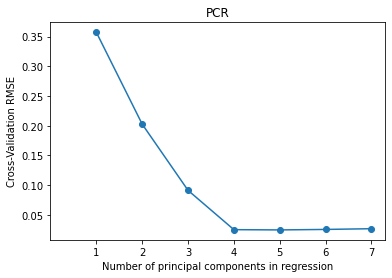

In [77]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
# plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [78]:
# Visually determine optimal number of principal components
best_pc_num = 4

#### Predict

In [79]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [80]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9843509739507725

In [81]:
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()
pcr_score_train

0.12566930706324253

In [82]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(7, 4)

In [83]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

0.8652916521757689